https://keras.io/models/sequential/ 附上Keras文檔供各位參考

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)#不設也可以

Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data() #去Cifar-10 網頁下載資料集並載入資料 https://www.cs.toronto.edu/~kriz/cifar.html

https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
print("訓練資料長相：",x_train.shape) #四維array，第一項代表筆數，第二三項代表32X32的圖片，第四項代表三原色
print("訓練解答長相：",y_train.shape)


訓練資料長相： (50000, 32, 32, 3)
訓練解答長相： (50000, 1)


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
print("訓練資料筆數：",x_train.shape[0])
print("測試資料筆數：",x_test.shape[0])

訓練資料筆數： 50000
測試資料筆數： 10000


In [8]:
x_train_nor = x_train.astype("float32")/255.0 #標準化，並把資料型態轉成float 
x_test_nor = x_test.astype("float32")/255.0


![資料標準化](資料標準化.png)

https://medium.com/datainpoint/evaluating-reg-e993ce27b61

In [9]:
x_train_nor[0]

array([[[ 0.23137255,  0.24313726,  0.24705882],
        [ 0.16862746,  0.18039216,  0.17647059],
        [ 0.19607843,  0.1882353 ,  0.16862746],
        ..., 
        [ 0.61960787,  0.51764709,  0.42352942],
        [ 0.59607846,  0.49019608,  0.40000001],
        [ 0.58039218,  0.48627451,  0.40392157]],

       [[ 0.0627451 ,  0.07843138,  0.07843138],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.07058824,  0.03137255,  0.        ],
        ..., 
        [ 0.48235294,  0.34509805,  0.21568628],
        [ 0.46666667,  0.32549021,  0.19607843],
        [ 0.47843137,  0.34117648,  0.22352941]],

       [[ 0.09803922,  0.09411765,  0.08235294],
        [ 0.0627451 ,  0.02745098,  0.        ],
        [ 0.19215687,  0.10588235,  0.03137255],
        ..., 
        [ 0.4627451 ,  0.32941177,  0.19607843],
        [ 0.47058824,  0.32941177,  0.19607843],
        [ 0.42745098,  0.28627452,  0.16470589]],

       ..., 
       [[ 0.81568629,  0.66666669,  0.3764706 ],
        

In [10]:
from keras.utils import np_utils #引進分類帽

one-hot encoding

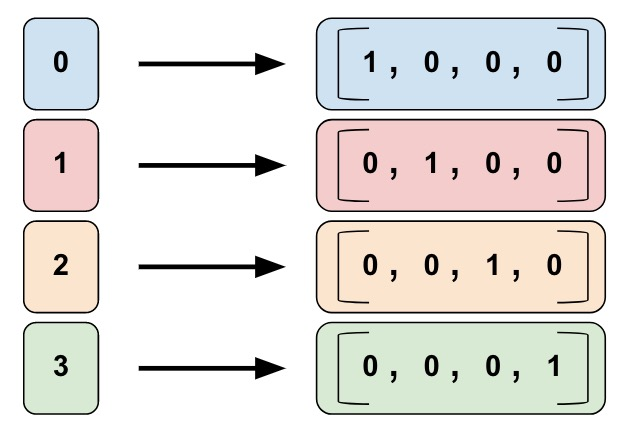

In [11]:
y_train_oh = np_utils.to_categorical(y_train) #轉變解答的型態
y_test_oh = np_utils.to_categorical(y_test)

In [12]:
y_train_oh[0] #變成這樣

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], dtype=float32)

In [13]:
y_train_oh.shape

(50000, 10)

In [14]:
#從keras裡取工具
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [15]:
model = Sequential() #模型起手式

In [16]:
#第一層卷積層，我們要餵給模型的資料有三個channel,分別是RGB
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3)
                ,activation = "relu", padding = "same"))

In [17]:
#不需要每次都把資料全吃進去可以掉一些
model.add(Dropout(rate= 0.25))

In [18]:
#池化層，這裡使用最大池化，可以用區域最大值去代表整個區域。
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(64, (3,3), activation = "relu", padding = "same"))

In [20]:
model.add(Dropout(rate= 0.25))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Conv2D(128, (3,3), activation = "relu", padding = "same"))

In [23]:
model.add(Dropout(rate= 0.25))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#把剛剛做的一系列轉換變成一維的長相，model比較好吃
model.add(Flatten())

In [26]:
model.add(Dropout(rate=0.25))

In [27]:
model.add(Dense(1024, activation="relu"))

In [28]:
model.add(Dropout(rate=0.25))

In [29]:
#輸出結果的樣子，要長得像剛剛轉換過後的答案，softmax可以把輸出變成加起來為1的結果
model.add(Dense(10, activation="softmax"))

In [30]:
#看看你的模型現在長什麼樣
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [31]:
#訓練前最後準備
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Adaptive moment:https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

解釋categorical_crossentropy:https://www.youtube.com/watch?v=tRsSi_sqXjI(看)

https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb(參考)

# Keras 文檔是這樣說...


Note: when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical。 

In [32]:
#訓練起來
training = model.fit(x_train_nor, y_train_oh, epochs=10, batch_size=128, validation_data=(x_test_nor, y_test_oh))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 72s 1ms/step - loss: 1.5134 - acc: 0.4476 - val_loss: 1.3305 - val_acc: 0.5662
Epoch 2/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.1061 - acc: 0.6070 - val_loss: 1.1574 - val_acc: 0.6337
Epoch 3/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.9499 - acc: 0.6642 - val_loss: 1.0436 - val_acc: 0.6643
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.8579 - acc: 0.6971 - val_loss: 0.9078 - val_acc: 0.6981
Epoch 5/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.7752 - acc: 0.7278 - val_loss: 0.8567 - val_acc: 0.7263
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.7137 - acc: 0.7482 - val_loss: 0.8335 - val_acc: 0.7250
Epoch 7/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.6637 - acc: 0.7656 - val_loss: 0.7751 - val_acc

In [33]:
#看看準確率是多少
score = model.evaluate(x_test_nor, y_test_oh)
print("預測的loss：", score[0])
print("預測成功率：", score[1])

10000/10000 [==============================] - 6s 568us/step
預測的loss： 0.720452865219
預測成功率： 0.7625


In [34]:
#畫圖囉
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# 模型存檔
model.save('cifar10_group2.h5') 

In [36]:
#看看預測結果（單一）
prediction = model.predict_classes(x_test_nor)

In [38]:
print("預測結果：", prediction[:10])
print("原本答案：", y_test[:10])

預測結果： [3 8 8 0 6 6 1 4 3 1]
原本答案： [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [39]:
#看看預測結果（機率）
prediction_probability = model.predict(x_test_nor)

In [41]:
print("預測結果：", prediction_probability[0])
print("原本答案：", y_test_oh[0])

預測結果： [ 0.00413558  0.00370984  0.00257089  0.50270444  0.00136808  0.44843614
  0.00819923  0.00206378  0.02550795  0.00130417]
原本答案： [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [42]:
#補個LABEL數字跟圖片的關係
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#來看看圖片以及預測結果
from ipywidgets import interact_manual
def identify(testnumber):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[testnumber])
    plt.show()
    print("神經網路：",LABELS[prediction[testnumber]])
    print("正確答案：",LABELS[y_test[testnumber][0]])
    for j in range(10):
        print(LABELS[j],"預測機率：%1.9f" %(prediction_probability[testnumber][j]))
interact_manual(identify, testnumber=(0,10000-1))

In [43]:
#用用熊貓套件
import pandas as pd

In [44]:
#先整理整理資料形狀
y_test_res = y_test.reshape(-1)

In [45]:
#來看看預測和實際結果的出入
print(LABELS)
pd.crosstab(y_test_res, prediction, rownames=["answer"], colnames=["predict"])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


predict,0,1,2,3,4,5,6,7,8,9
answer,,,,,,,,,,
0,847,16,37,17,16,12,8,9,30,8
1,15,923,5,11,2,5,8,0,12,19
2,62,4,665,59,101,45,50,7,6,1
3,20,4,62,642,69,122,60,15,4,2
4,16,1,47,59,807,20,29,18,2,1
5,9,4,48,195,54,650,25,14,1,0
6,5,3,39,55,30,14,853,1,0,0
7,16,0,35,61,90,58,3,732,3,2
8,62,31,19,27,12,5,12,0,825,7
